# **Problema de negócio**

# Precisamos prever a taxa de esgotamento dos funcionários com base nos recursos fornecidos, ajudando assim a empresa a tomar as medidas adequadas para saúde mental dos seus colaboradores.

# **Análise Exploratória de Dados**



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from datetime import datetime

In [5]:
df = pd.read_csv("train.csv")

In [6]:
display(df)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


Renomeia o titulo das colunas para o português

In [7]:
df.rename(columns={'Employee ID' : 'ID', 'Date of Joining': 'Admissao', 'Gender': 'Sexo', 'Company Type': 'Atuacao', 'WFH Setup Available': 'Home_Office','Designation': 'Relevancia', 'Resource Allocation': 'Horas_Trabalhadas', 'Mental Fatigue Score': 'Fadiga_Mental', 'Burn Rate':'Burnout'}, inplace=True)
df.describe()

,Relevancia,Horas_Trabalhadas,Fadiga_Mental,Burnout
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [8]:
df.shape

(22750, 9)

# Atribuindo Mediana aos valores Nulos

In [9]:
df.isnull().sum()

ID                      0
Admissao                0
Sexo                    0
Atuacao                 0
Home_Office             0
Relevancia              0
Horas_Trabalhadas    1381
Fadiga_Mental        2117
Burnout              1124
dtype: int64

In [10]:
##Valores atribuidos aos campos nulos das horas trabalhadas
#mediana_horasTrabalhadas = df['Horas Trabalhadas'].median()
#mediana_horasTrabalhadas
#horas = df["Horas Trabalhadas"]
#horas.fillna(mediana_horasTrabalhadas, inplace=True)

In [11]:
##Valores atribuidos aos campos nulos das da fadiga mental
#mediana_fadigaMental = df['Fadiga Mental'].median()
#mediana_fadigaMental
#fadigaMental = df["Fadiga Mental"]
#fadigaMental.fillna(mediana_fadigaMental, inplace= True)

In [12]:
##Valores atribuidos aos campos nulos do Burn Rate
##mediana_burnRate = df['Burn Rate'].median()
##mediana_burnRate
#burnRate = df["Burn Rate"]
#burnRate.fillna(mediana_burnRate, inplace=True)

In [13]:
##Valores atribuidos aos campos nulos das horas trabalhadas(média)
media_horasTrabalhadas = df['Horas_Trabalhadas'].mean()
media_horasTrabalhadas
horas = df["Horas_Trabalhadas"]
##horas.fillna(media_horasTrabalhadas, inplace=True)
horas.fillna(4.0, inplace=True)

In [14]:
##Valores atribuidos aos campos nulos das da fadiga mental (média)
media_fadigaMental = df['Fadiga_Mental'].mean()
media_fadigaMental
fadigaMental = df["Fadiga_Mental"]
fadigaMental.fillna(media_fadigaMental, inplace= True)

In [15]:
#Valores atribuidos aos campos nulos do Burn Rate
media_burnRate = df['Burnout'].mean()
media_burnRate
burnRate = df["Burnout"]
burnRate.fillna(media_burnRate, inplace=True)

In [16]:
df.isnull().sum()

ID                   0
Admissao             0
Sexo                 0
Atuacao              0
Home_Office          0
Relevancia           0
Horas_Trabalhadas    0
Fadiga_Mental        0
Burnout              0
dtype: int64

###Não há valores duplicados

In [17]:
duplicados = df[df.duplicated()]
duplicados

,ID,Admissao,Sexo,Atuacao,Home_Office,Relevancia,Horas_Trabalhadas,Fadiga_Mental,Burnout


# **Estatisticas das váriaveis**

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com o Sexo')

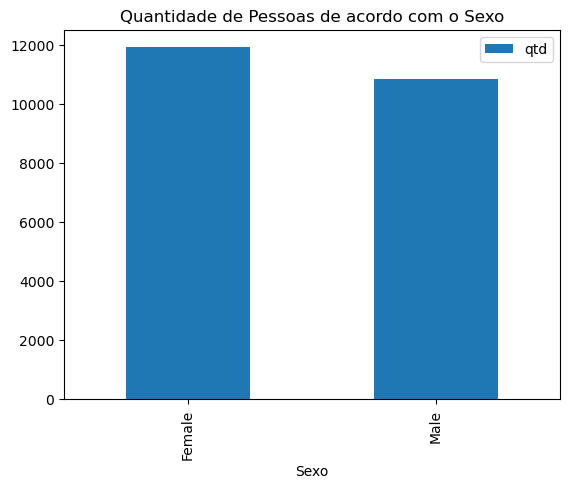

In [18]:
## Números de pessoas de acordo com o Sexo
agrupado_sexo = df.groupby('Sexo').size().reset_index(name='qtd')
agrupado_sexo.plot(kind='bar', x='Sexo', y='qtd')
plt.title('Quantidade de Pessoas de acordo com o Sexo')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com a Home Office')

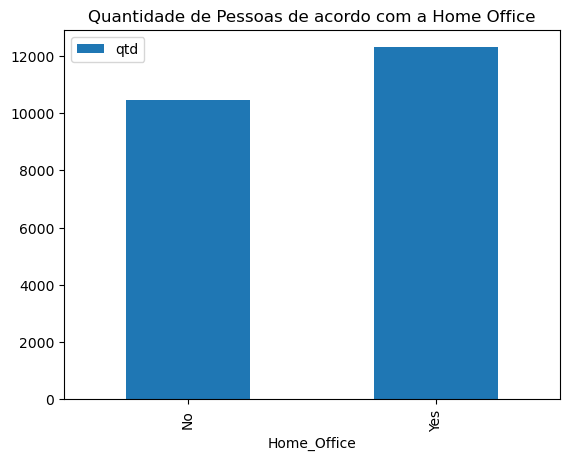

In [19]:
##Número de pesoas que trabalham ou não em Home Office
agrupado_home = df.groupby('Home_Office').size().reset_index(name='qtd')
agrupado_home.plot(kind='bar', x='Home_Office', y='qtd')
plt.title('Quantidade de Pessoas de acordo com a Home Office')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com a Atuacao')

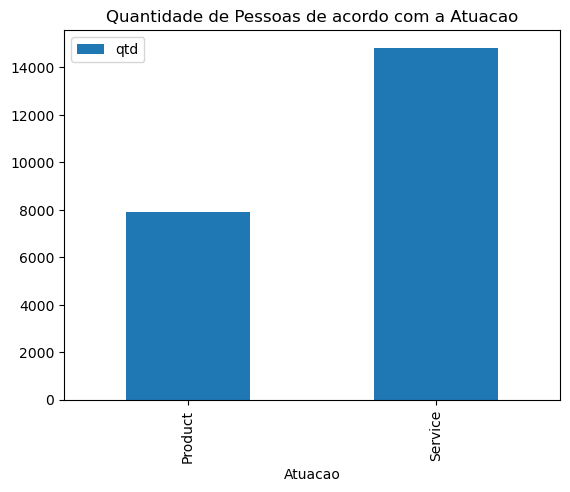

In [20]:
##Quantidade de Pessoas de acordo com a Atuação
agrupado_atuacao = df.groupby('Atuacao').size().reset_index(name='qtd')
agrupado_atuacao.plot(kind='bar', x='Atuacao', y='qtd')
plt.title('Quantidade de Pessoas de acordo com a Atuacao')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com a Relevancia')

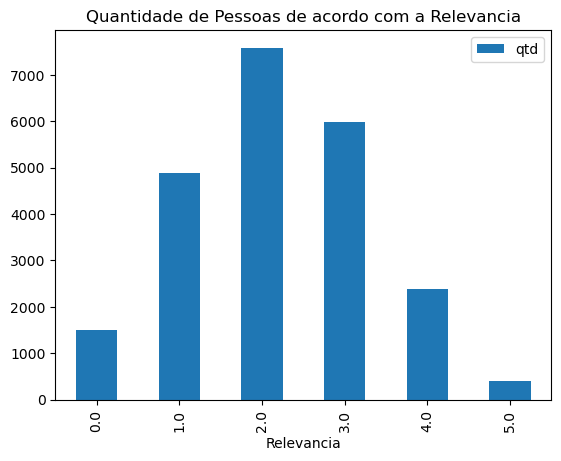

In [21]:
agrupado_relevancia = df.groupby('Relevancia').size().reset_index(name='qtd')
agrupado_relevancia.plot(kind='bar', x='Relevancia', y='qtd')
plt.title('Quantidade de Pessoas de acordo com a Relevancia')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com as horas trabalhadas')

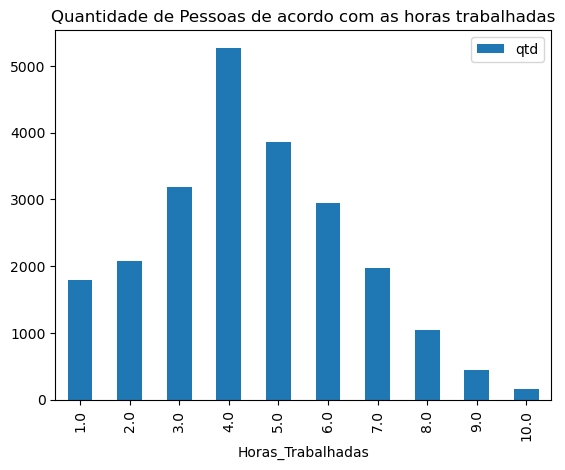

In [22]:
agrupado_horastrabalhadas = df.groupby('Horas_Trabalhadas').size().reset_index(name='qtd')
agrupado_horastrabalhadas.plot(kind='bar', x='Horas_Trabalhadas', y='qtd')
plt.title('Quantidade de Pessoas de acordo com as horas trabalhadas')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com a Fadiga Mental')

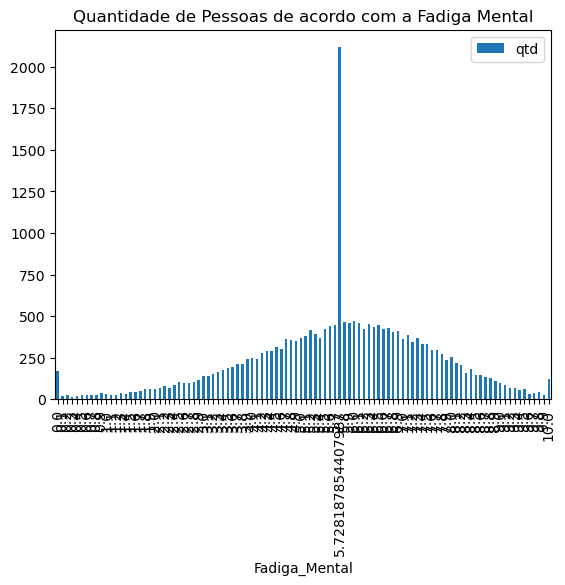

In [23]:
agrupado_fadigaMental = df.groupby('Fadiga_Mental').size().reset_index(name='qtd')
agrupado_fadigaMental.plot(kind='bar', x='Fadiga_Mental', y='qtd')
plt.title('Quantidade de Pessoas de acordo com a Fadiga Mental')

Text(0.5, 1.0, 'Quantidade de Pessoas de acordo com a Burn Rate')

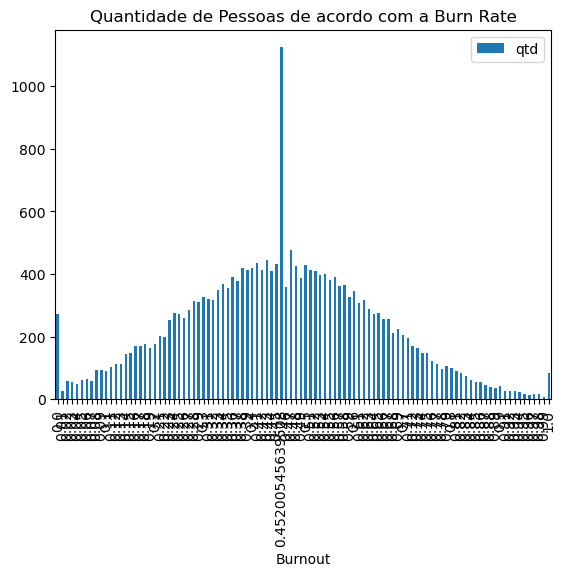

In [24]:
##Quantidade de Pessoas de acordo com a Burn Rate
agrupado_burnRate = df.groupby('Burnout').size().reset_index(name='qtd')
agrupado_burnRate.plot(kind='bar', x='Burnout', y='qtd')
plt.title('Quantidade de Pessoas de acordo com a Burn Rate')

##BoxPlot's

In [25]:
##Não há Outliers
#sns.boxplot(df['Horas Trabalhadas'])

In [26]:
#sns.boxplot(df['Fadiga Mental'])

In [27]:
#df["Outlier"] = np.where(df["Fadiga Mental"] < 2 , True, False)
##df.loc[df["Outlier"] == True, "Fadiga Mental"] = mediana_fadigaMental
#df.loc[df["Outlier"] == True, "Fadiga Mental"] = media_fadigaMental

In [28]:
#sns.boxplot(df['Burn Rate'])

In [29]:
#df.drop(columns='Outlier', axis=1, inplace=False)


In [30]:
#df["Outlier"] = np.where(df["Burn Rate"] > 0.9, True, False)
##df.loc[df["Outlier"] == True, "Burn Rate"] = mediana_burnRate
##df.loc[df["Outlier"] == True, "Burn Rate"] = media_burnRate

In [31]:
#df.drop(columns='Outlier', axis=1, inplace=True)

# **-----------------------------------------**

# **Pré-Processamento de Dados**

### LabelEncoder - Variáveis não numéricas

Transformando a Admissão em um objeto DateTime

In [32]:
df['Data'] = pd.to_datetime(df['Admissao'], format='%Y/%m/%d')


In [33]:
df['Dias'] = (datetime.today() - df['Data']).dt.days

In [34]:
df

,ID,Admissao,Sexo,Atuacao,Home_Office,Relevancia,Horas_Trabalhadas,Fadiga_Mental,Burnout,Data,Dias
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.800000,0.16,2008-09-30,5285
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.000000,0.36,2008-11-30,5224
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.800000,0.49,2008-03-10,5489
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.600000,0.20,2008-11-03,5251
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.900000,0.52,2008-07-24,5353
...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,5.728188,0.41,2008-12-30,5194
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.700000,0.59,2008-01-19,5540
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,5.728188,0.72,2008-11-05,5249
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.900000,0.52,2008-01-10,5549


Trabalha em Home Office?

*   Sim: 1
*   Não: 0



In [35]:
df['Home_Office'].replace({"Yes": 1, "No": 0}, inplace=True)

Área de Atuação da Empresa:

*   Produtos: 0
*   Serviços: 1



In [36]:
df['Atuacao'].replace({"Service": 1, "Product": 0}, inplace=True)

C:\Users\GIDEONE\AppData\Local\Temp\ipykernel_8120\3759155405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Atuacao']).set_title("Indice de Pessoas por Atuação")


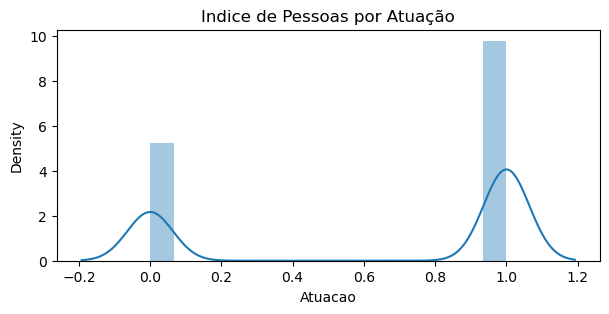

In [37]:
plt.figure(figsize=(7,3), dpi=100)
sns.distplot(df['Atuacao']).set_title("Indice de Pessoas por Atuação")
plt.show()

*   Feminino: 0
*   Masculino: 1



In [38]:
df['Sexo'].replace({"Female": 0, "Male": 1}, inplace=True)

In [39]:
print("###############Fadiga_Mental##################\n")
print(df.corr()['Fadiga_Mental'])
print("###############Relevancia##################\n")
print(df.corr()['Relevancia'])
print("###############Horas_Trabalhadas##################\n")
print(df.corr()['Horas_Trabalhadas'])

###############Fadiga_Mental##################

Sexo                 0.138735
Atuacao              0.002532
Home_Office         -0.263429
Relevancia           0.656445
Horas_Trabalhadas    0.738250
Fadiga_Mental        1.000000
Burnout              0.878217
Dias                -0.002301
Name: Fadiga_Mental, dtype: float64
###############Relevancia##################

Sexo                 0.113295
Atuacao              0.006095
Home_Office         -0.229720
Relevancia           1.000000
Horas_Trabalhadas    0.850656
Fadiga_Mental        0.656445
Burnout              0.719284
Dias                 0.000930
Name: Relevancia, dtype: float64
###############Horas_Trabalhadas##################

Sexo                 0.138321
Atuacao              0.006263
Home_Office         -0.275692
Relevancia           0.850656
Horas_Trabalhadas    1.000000
Fadiga_Mental        0.738250
Burnout              0.809925
Dias                 0.000612
Name: Horas_Trabalhadas, dtype: float64


C:\Users\GIDEONE\AppData\Local\Temp\ipykernel_8120\1086729883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['Fadiga_Mental'])
C:\Users\GIDEONE\AppData\Local\Temp\ipykernel_8120\1086729883.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['Relevancia'])
C:\Users\GIDEONE\AppData\Local\Temp\ipykernel_8120\1086729883.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['Horas_Trabalhadas'])


Text(0.5, 1.0, 'Relação entre Sexo e Fadiga Mental')

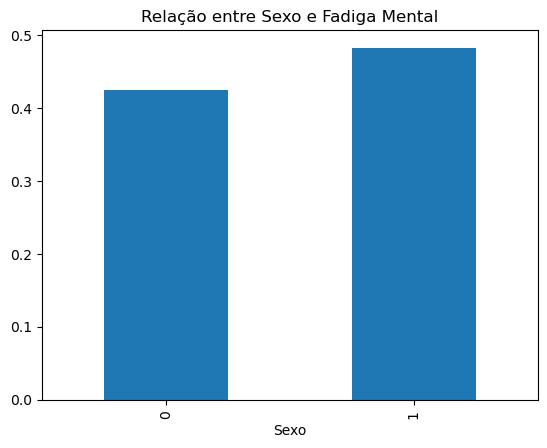

In [40]:
rel_sexo_fadiga = df.drop(columns=['ID','Atuacao', 'Home_Office', 'Relevancia', 'Horas_Trabalhadas'], inplace=False)
sexo_agrupado = rel_sexo_fadiga.groupby('Sexo')
media_fadiga_sexo = sexo_agrupado['Burnout'].mean()
media_fadiga_sexo.plot(kind='bar', x='sexo', y='Burnout')
plt.title('Relação entre Sexo e Fadiga Mental')

Text(0.5, 1.0, 'Relação entre Horas Trabalhadas e o Burn Rate')

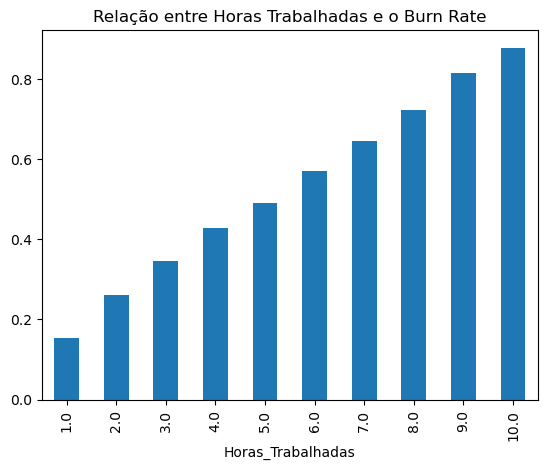

In [41]:
rel_horas_fadiga = df.drop(columns=['ID','Atuacao', 'Home_Office', 'Relevancia', 'Sexo'], inplace=False)
horas_agrupado = rel_horas_fadiga.groupby('Horas_Trabalhadas')
media_fadiga_horas = horas_agrupado['Burnout'].mean()
media_fadiga_horas.plot(kind='bar', x='Horas_Trabalhadas', y='Burnout')
plt.title('Relação entre Horas Trabalhadas e o Burn Rate')

### Eliminando Variáveis que não são explicativas para a previsão

In [42]:
df.drop(columns='ID', axis=1, inplace=True)
df.drop(columns='Admissao', axis=1, inplace=True)
df.drop(columns='Data', axis=1, inplace=True)
df.drop(columns='Horas_Trabalhadas', axis=1, inplace=True)
df.drop(columns='Relevancia', axis=1, inplace=True)

In [43]:
df

,Sexo,Atuacao,Home_Office,Fadiga_Mental,Burnout,Dias
0,0,1,0,3.800000,0.16,5285
1,1,1,1,5.000000,0.36,5224
2,0,0,1,5.800000,0.49,5489
3,1,1,1,2.600000,0.20,5251
4,0,1,0,6.900000,0.52,5353
...,...,...,...,...,...,...
22745,0,1,0,5.728188,0.41,5194
22746,0,0,1,6.700000,0.59,5540
22747,1,1,1,5.728188,0.72,5249
22748,0,1,0,5.900000,0.52,5549


<Axes: >

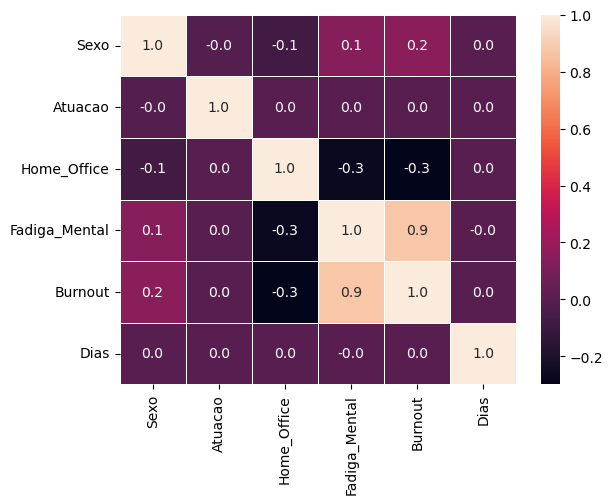

In [44]:
correlacao = df.corr(method='pearson')
plot = sns.heatmap(df.corr(method='pearson'),  annot = True, fmt=".1f", linewidths=.6)
plot

### Criando variável x (alvo) e y (dependente)

In [45]:
#y = df.pop("Fadiga Mental")
y = df.pop("Burnout")
X = df

### Fazendo a amostragem de dados

Iniciando com train test split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state= 42)          #usa 80% dos para treinar e 20% para avaliar;   

Mostrando os dados de treino e teste

In [47]:
print("train data size: ",X_train.shape)
print("test data size: ",X_test.shape)

train data size:  (18200, 5)
test data size:  (4550, 5)


In [49]:
x = df.iloc[:, 1].values
y = df.iloc[:, 0].values
print(x)
print(y)

[1 1 0 ... 1 1 0]
[0 1 0 ... 1 0 1]


**Light GBM Regression** 


In [50]:
# Iniciando o Modelo
lg = LGBMRegressor()

# Fit the model
lg.fit(X_train, y_train)

# Realizando predições
lg_y_pred = lg.predict(X_test)

In [51]:
##Métricas de Avaliação
  #R-Quadrado (Quanto maior o valor, melhor)
lr_r2= r2_score(y_test, lg_y_pred)
print("Light GBM Regression R2: ", lr_r2)

  #Raiz do erro quadrático médio (RMSE) (Quanto menor o valor, melhor)
rmse = (np.sqrt(mean_squared_error(y_test,lg_y_pred)))
print("Light GBM Regression RMSE:", rmse)

  #Erro Absoluto Médio (MAE) (Quanto maior o valor, melhor)
MAE = mean_absolute_error(y_test,lg_y_pred)
print("Light GBM Regression MAE:",MAE)

  #Erro Quadrático Médio (MSE) (Quanto menor o valor, melhor)
MSE = mean_squared_error(y_test,lg_y_pred)
print("Light GBM Regression MSE:", MSE)

  #R-Quadrado Ajustado (Quanto maior o valor, melhor)
def adjusted_r2(y_test, y_pred,X_train):
  Adj_r2 = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / 
          (len(y_test) - X_train.shape[1] - 1))
    
  return Adj_r2

print("Light GBM Regression R ajustado:", adjusted_r2(y_test, lg_y_pred, X_train))

Light GBM Regression R2:  0.7871126742950698
Light GBM Regression RMSE: 0.08753734232694953
Light GBM Regression MAE: 0.06383844154793544
Light GBM Regression MSE: 0.00766278630166555
Light GBM Regression R ajustado: 0.7868784232764685


Salvando a máquina

In [52]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva.pkl", mode = "wb") 
pickle.dump(lg, pickle_out) 
pickle_out.close()